<a href="https://colab.research.google.com/github/AnjaneyaBhardwaj/Feedback_Sentiment_Analysis/blob/main/Feedback_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Musical_instruments_reviews.csv"

In [ ]:
df = pd.read_csv(path)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [ ]:
len(df)

10261

In [ ]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [ ]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [ ]:
#df=df.drop(columns=['reviewerID','asin','reviewerName','helpful','overall','summary','unixReviewTime','reviewTime'])
df = df[["reviewText"]]

In [ ]:
df

,reviewText
0,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...
...,...
10256,"Great, just as expected. Thank to all."
10257,I've been thinking about trying the Nanoweb st...
10258,I have tried coated strings in the past ( incl...
10259,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [ ]:
df=df.dropna()

#techniques to handle nan values

In [ ]:
df.isnull().sum()

reviewText    0
dtype: int64

In [ ]:
df

,reviewText
0,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...
...,...
10256,"Great, just as expected. Thank to all."
10257,I've been thinking about trying the Nanoweb st...
10258,I have tried coated strings in the past ( incl...
10259,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [ ]:
df_lower = df['reviewText'].str.lower()

In [ ]:
df_lower = pd.DataFrame(df_lower)

In [ ]:
df_lower

,reviewText
0,"not much to write about here, but it does exac..."
1,the product does exactly as it should and is q...
2,the primary job of this device is to block the...
3,nice windscreen protects my mxl mic and preven...
4,this pop filter is great. it looks and perform...
...,...
10256,"great, just as expected. thank to all."
10257,i've been thinking about trying the nanoweb st...
10258,i have tried coated strings in the past ( incl...
10259,"well, made by elixir and developed with taylor..."


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

In [ ]:
df_lower['reviewText'] = df_lower['reviewText'].apply(regexp.tokenize)

In [ ]:
df_lower

,reviewText
0,"[not, much, to, write, about, here, but, it, d..."
1,"[the, product, does, exactly, as, it, should, ..."
2,"[the, primary, job, of, this, device, is, to, ..."
3,"[nice, windscreen, protects, my, mxl, mic, and..."
4,"[this, pop, filter, is, great, it, looks, and,..."
...,...
10256,"[great, just, as, expected, thank, to, all]"
10257,"[i, ve, been, thinking, about, trying, the, na..."
10258,"[i, have, tried, coated, strings, in, the, pas..."
10259,"[well, made, by, elixir, and, developed, with,..."


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
stop_words = set(stopwords) - set(["not","don't","ain'",
 'aren',"nor",
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"])

In [ ]:
df_lower

,reviewText
0,"[not, much, to, write, about, here, but, it, d..."
1,"[the, product, does, exactly, as, it, should, ..."
2,"[the, primary, job, of, this, device, is, to, ..."
3,"[nice, windscreen, protects, my, mxl, mic, and..."
4,"[this, pop, filter, is, great, it, looks, and,..."
...,...
10256,"[great, just, as, expected, thank, to, all]"
10257,"[i, ve, been, thinking, about, trying, the, na..."
10258,"[i, have, tried, coated, strings, in, the, pas..."
10259,"[well, made, by, elixir, and, developed, with,..."


In [ ]:
df_lower['reviewText'] = df_lower['reviewText'].apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
df_lower['reviewText']

0        [not, much, write, exactly, supposed, filters,...
1        [product, exactly, quite, affordable, not, rea...
2        [primary, job, device, block, breath, would, o...
3        [nice, windscreen, protects, mxl, mic, prevent...
4        [pop, filter, great, looks, performs, like, st...
                               ...                        
10256                             [great, expected, thank]
10257    [thinking, trying, nanoweb, strings, bit, put,...
10258    [tried, coated, strings, past, including, elix...
10259    [well, made, elixir, developed, taylor, guitar...
10260    [strings, really, quite, good, wouldn, call, p...
Name: reviewText, Length: 10254, dtype: object

In [ ]:
df_lower

,reviewText
0,"[not, much, write, exactly, supposed, filters,..."
1,"[product, exactly, quite, affordable, not, rea..."
2,"[primary, job, device, block, breath, would, o..."
3,"[nice, windscreen, protects, mxl, mic, prevent..."
4,"[pop, filter, great, looks, performs, like, st..."
...,...
10256,"[great, expected, thank]"
10257,"[thinking, trying, nanoweb, strings, bit, put,..."
10258,"[tried, coated, strings, past, including, elix..."
10259,"[well, made, elixir, developed, taylor, guitar..."


In [ ]:
df_lower['reviewText'] = df_lower['reviewText'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [ ]:
df_lower

,reviewText
0,not much write exactly supposed filters pop so...
1,product exactly quite affordable not realized ...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pops...
4,pop filter great looks performs like studio fi...
...,...
10256,great expected thank
10257,thinking trying nanoweb strings bit put high p...
10258,tried coated strings past including elixirs ne...
10259,well made elixir developed taylor guitars stri...


In [ ]:
all_words = ' '.join([word for word in df_lower['reviewText']])

In [ ]:
df_lower

,reviewText
0,not much write exactly supposed filters pop so...
1,product exactly quite affordable not realized ...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pops...
4,pop filter great looks performs like studio fi...
...,...
10256,great expected thank
10257,thinking trying nanoweb strings bit put high p...
10258,tried coated strings past including elixirs ne...
10259,well made elixir developed taylor guitars stri...


In [ ]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'not': 5995, 'guitar': 5611, 'one': 4558, 'great': 4121, 'like': 3981, 'good': 3811, 'use': 3788, 'sound': 3609, 'strings': 3420, 'well': 3235, ...})

In [ ]:
df_lower

,reviewText
0,not much write exactly supposed filters pop so...
1,product exactly quite affordable not realized ...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pops...
4,pop filter great looks performs like studio fi...
...,...
10256,great expected thank
10257,thinking trying nanoweb strings bit put high p...
10258,tried coated strings past including elixirs ne...
10259,well made elixir developed taylor guitars stri...


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df_lower['reviewText'] = df_lower['reviewText'].apply(wordnet_lem.lemmatize)

In [ ]:
df_lower['reviewText']

0        not much write exactly supposed filters pop so...
1        product exactly quite affordable not realized ...
2        primary job device block breath would otherwis...
3        nice windscreen protects mxl mic prevents pops...
4        pop filter great looks performs like studio fi...
                               ...                        
10256                                 great expected thank
10257    thinking trying nanoweb strings bit put high p...
10258    tried coated strings past including elixirs ne...
10259    well made elixir developed taylor guitars stri...
10260    strings really quite good wouldn call perfect ...
Name: reviewText, Length: 10254, dtype: object

In [ ]:
all_words_lem = ' '.join([word for word in df_lower['reviewText']])

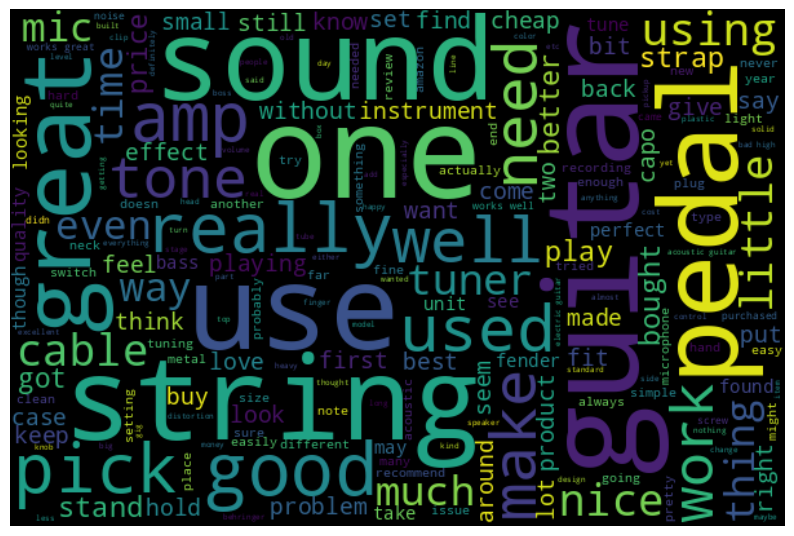

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [ ]:
fd.most_common(3)

[('not', 5995), ('guitar', 5611), ('one', 4558)]

In [ ]:
fd.tabulate(3)

   not guitar    one 
  5995   5611   4558 


In [ ]:
top_10 = fd.most_common(10)

In [ ]:
fdist = pd.Series(dict(top_10))

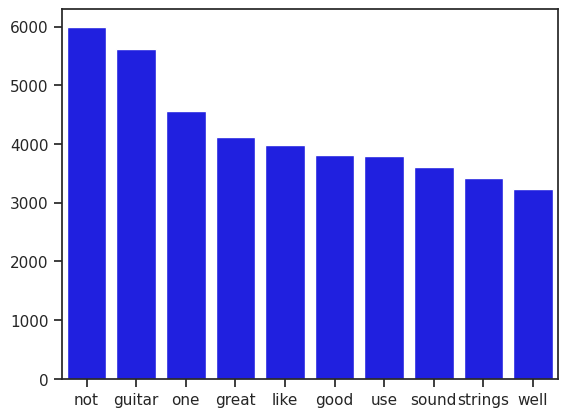

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(x=fdist.index, y=fdist.values, color='blue');

In [ ]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [ ]:
df_lower['polarity'] = df_lower['reviewText'].apply(lambda x: analyzer.polarity_scores(x))
df_lower.tail(3)

,reviewText,polarity
10258,tried coated strings past including elixirs ne...,"{'neg': 0.035, 'neu': 0.649, 'pos': 0.316, 'co..."
10259,well made elixir developed taylor guitars stri...,"{'neg': 0.086, 'neu': 0.72, 'pos': 0.193, 'com..."
10260,strings really quite good wouldn call perfect ...,"{'neg': 0.09, 'neu': 0.548, 'pos': 0.361, 'com..."


In [ ]:
df_lower

,reviewText,polarity
0,not much write exactly supposed filters pop so...,"{'neg': 0.088, 'neu': 0.68, 'pos': 0.231, 'com..."
1,product exactly quite affordable not realized ...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp..."
2,primary job device block breath would otherwis...,"{'neg': 0.102, 'neu': 0.847, 'pos': 0.051, 'co..."
3,nice windscreen protects mxl mic prevents pops...,"{'neg': 0.087, 'neu': 0.595, 'pos': 0.317, 'co..."
4,pop filter great looks performs like studio fi...,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp..."
...,...,...
10256,great expected thank,"{'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'comp..."
10257,thinking trying nanoweb strings bit put high p...,"{'neg': 0.069, 'neu': 0.711, 'pos': 0.221, 'co..."
10258,tried coated strings past including elixirs ne...,"{'neg': 0.035, 'neu': 0.649, 'pos': 0.316, 'co..."
10259,well made elixir developed taylor guitars stri...,"{'neg': 0.086, 'neu': 0.72, 'pos': 0.193, 'com..."


In [ ]:
df_lower['polarity'].apply(pd.Series)

,neg,neu,pos,compound
0,0.088,0.680,0.231,0.4939
1,0.000,0.743,0.257,0.9359
2,0.102,0.847,0.051,-0.3400
3,0.087,0.595,0.317,0.5859
4,0.000,0.663,0.337,0.7650
...,...,...,...,...
10256,0.000,0.132,0.868,0.7650
10257,0.069,0.711,0.221,0.9911
10258,0.035,0.649,0.316,0.9639
10259,0.086,0.720,0.193,0.9576


In [ ]:
df_lower

,reviewText,polarity
0,not much write exactly supposed filters pop so...,"{'neg': 0.088, 'neu': 0.68, 'pos': 0.231, 'com..."
1,product exactly quite affordable not realized ...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp..."
2,primary job device block breath would otherwis...,"{'neg': 0.102, 'neu': 0.847, 'pos': 0.051, 'co..."
3,nice windscreen protects mxl mic prevents pops...,"{'neg': 0.087, 'neu': 0.595, 'pos': 0.317, 'co..."
4,pop filter great looks performs like studio fi...,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp..."
...,...,...
10256,great expected thank,"{'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'comp..."
10257,thinking trying nanoweb strings bit put high p...,"{'neg': 0.069, 'neu': 0.711, 'pos': 0.221, 'co..."
10258,tried coated strings past including elixirs ne...,"{'neg': 0.035, 'neu': 0.649, 'pos': 0.316, 'co..."
10259,well made elixir developed taylor guitars stri...,"{'neg': 0.086, 'neu': 0.72, 'pos': 0.193, 'com..."


In [ ]:
df1 = df_lower['polarity'].apply(pd.Series)

In [ ]:
final_df = pd.concat([
df_lower, df1], axis = 1)

In [ ]:
final_df

,reviewText,polarity,neg,neu,pos,compound
0,not much write exactly supposed filters pop so...,"{'neg': 0.088, 'neu': 0.68, 'pos': 0.231, 'com...",0.088,0.680,0.231,0.4939
1,product exactly quite affordable not realized ...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...",0.000,0.743,0.257,0.9359
2,primary job device block breath would otherwis...,"{'neg': 0.102, 'neu': 0.847, 'pos': 0.051, 'co...",0.102,0.847,0.051,-0.3400
3,nice windscreen protects mxl mic prevents pops...,"{'neg': 0.087, 'neu': 0.595, 'pos': 0.317, 'co...",0.087,0.595,0.317,0.5859
4,pop filter great looks performs like studio fi...,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.000,0.663,0.337,0.7650
...,...,...,...,...,...,...
10256,great expected thank,"{'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'comp...",0.000,0.132,0.868,0.7650
10257,thinking trying nanoweb strings bit put high p...,"{'neg': 0.069, 'neu': 0.711, 'pos': 0.221, 'co...",0.069,0.711,0.221,0.9911
10258,tried coated strings past including elixirs ne...,"{'neg': 0.035, 'neu': 0.649, 'pos': 0.316, 'co...",0.035,0.649,0.316,0.9639
10259,well made elixir developed taylor guitars stri...,"{'neg': 0.086, 'neu': 0.72, 'pos': 0.193, 'com...",0.086,0.720,0.193,0.9576


In [ ]:
final_df['sentiment'] = final_df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

In [ ]:
final_df

,reviewText,polarity,neg,neu,pos,compound,sentiment
0,not much write exactly supposed filters pop so...,"{'neg': 0.088, 'neu': 0.68, 'pos': 0.231, 'com...",0.088,0.680,0.231,0.4939,positive
1,product exactly quite affordable not realized ...,"{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...",0.000,0.743,0.257,0.9359,positive
2,primary job device block breath would otherwis...,"{'neg': 0.102, 'neu': 0.847, 'pos': 0.051, 'co...",0.102,0.847,0.051,-0.3400,negative
3,nice windscreen protects mxl mic prevents pops...,"{'neg': 0.087, 'neu': 0.595, 'pos': 0.317, 'co...",0.087,0.595,0.317,0.5859,positive
4,pop filter great looks performs like studio fi...,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.000,0.663,0.337,0.7650,positive
...,...,...,...,...,...,...,...
10256,great expected thank,"{'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'comp...",0.000,0.132,0.868,0.7650,positive
10257,thinking trying nanoweb strings bit put high p...,"{'neg': 0.069, 'neu': 0.711, 'pos': 0.221, 'co...",0.069,0.711,0.221,0.9911,positive
10258,tried coated strings past including elixirs ne...,"{'neg': 0.035, 'neu': 0.649, 'pos': 0.316, 'co...",0.035,0.649,0.316,0.9639,positive
10259,well made elixir developed taylor guitars stri...,"{'neg': 0.086, 'neu': 0.72, 'pos': 0.193, 'com...",0.086,0.720,0.193,0.9576,positive


In [ ]:
final_df.loc[final_df['compound'].idxmax()].values

array(['constructionthis amp certainly looks sharp not nearly heavy would expect 100w amp seems well put together controlsthe iii comes button foot pedal feels solid works perfectly expand add optional button switch fender sells separately also includes amp separate knobs treble mids low gain volume master volume reverb along also lcd screen tells amp model using witch pedals presets delays reverbs also separate buttons changing amp models reverb delays modulation effects large knob top actually scrolls presets press deep editing amp models effects presets controls intuitive easy use great mix visual digital feedback well tactile knobs comparing amps fender gdec not much deep editing available amp need use computer edit download settings properly mustang iii not feel missing editing functionality not keeping plugged computer know another amp controls intuitive powerful sound important let first compare amp line vox peavy offered past companies gone heavy amp modeling offer endless numb

In [ ]:
final_df.loc[final_df['compound'].idxmin()].values

array(['whats not love inexpensive job reading rather poor reviews checked signs poor quality workmanship thing found pin rockrd bit three screws body used screwdiriver tighten suspect complaints falling apart could missing loose screws not much chore back screws bit added drop clear nail polish threads insurance would not loosen anyway view sit got used add post things turn bad',
       {'neg': 0.403, 'neu': 0.564, 'pos': 0.033, 'compound': -0.9766},
       0.403, 0.564, 0.033, -0.9766, 'negative'], dtype=object)

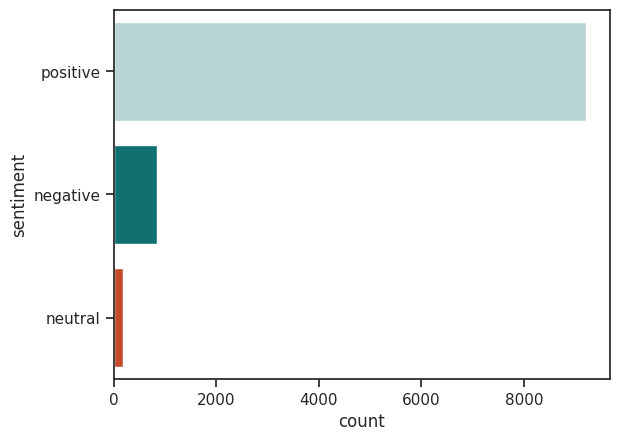

In [ ]:
sns.countplot(y='sentiment',
             data=final_df,
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

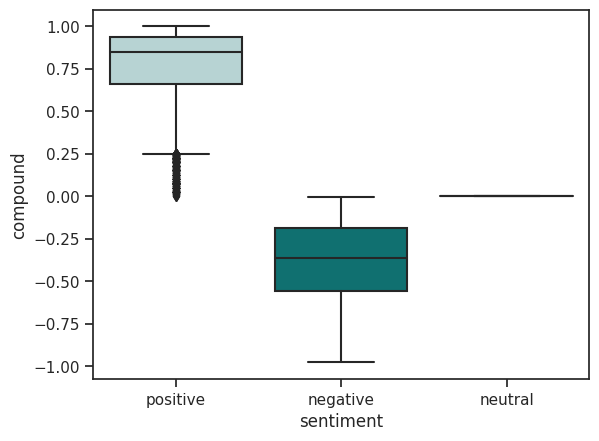

In [ ]:
sns.boxplot(y='compound',
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'],
            data=final_df);